# 1.0 An end-to-end classification problem (ETL)



## 1.1 Dataset description

Bank Marketing Data - A Decision Tree Approach

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

You can download the data from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Let's take the following steps:

1. Load Libraries
2. Fetch Data, including EDA
3. Pre-procesing
4. Data Segregation

<center><img width="600" src="https://drive.google.com/uc?export=view&id=1a-nyAPNPiVh-Xb2Pu2t2p-BhSvHJS0pO"></center>

## 1.2 Install and load libraries

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 30.2 MB/s 
     |████████████████████████████████| 145 kB 53.7 MB/s 
     |████████████████████████████████| 181 kB 58.2 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=ac30383984d652d3e7ecb12cc610d9731fe2f779a157df17af8654cf53c36f24
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
import wandb
import pandas as pd

import zipfile
from urllib.request import urlopen
import io

## 1.3 Fetch Data

### 1.3.1 Create the raw_data artifact

In [ ]:

# importing the dataset
# Load data file
# bank=pd.read_csv('../input/bank.csv')
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
zf = zipfile.ZipFile(io.BytesIO(urlopen(url).read()))
zf.filelist

[<ZipInfo filename='bank-full.csv' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=4610348 compress_size=514234>,
 <ZipInfo filename='bank-names.txt' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=3864 compress_size=1665>,
 <ZipInfo filename='bank.csv' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=461474 compress_size=62692>]

In [ ]:
bank = pd.read_csv(zf.open('bank-full.csv'), delimiter=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bank.to_csv("raw_data.csv",index=False)

In [ ]:
# Login to Weights & Biases
!wandb login --relogin

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# Send the raw_data.csv to the Wandb storing it as an artifact
run = wandb.init(project="decision_tree_bank", entity="mlops_ivan")
!wandb artifact put \
      --name mlops_ivan/decision_tree_bank/raw_data.csv \
      --type raw_data \
      --description "The raw data bank marketing data" raw_data.csv

wandb: Uploading file raw_data.csv to: "mlops_ivan/decision_tree_bank/raw_data.csv:latest" (raw_data)
wandb: Currently logged in as: francisvalfgs (mlops_ivan). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.12.16
wandb: Run data is saved locally in /content/wandb/run-20220523_233314-3r0l7wyn
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run dry-serenity-4
wandb: ⭐️ View project at https://wandb.ai/mlops_ivan/decision_tree_bank
wandb: 🚀 View run at https://wandb.ai/mlops_ivan/decision_tree_bank/runs/3r0l7wyn
Artifact uploaded, use this artifact in a run by adding:

    artifact = run.use_artifact("mlops_ivan/decision_tree_bank/raw_data.csv:latest")

wandb: Waiting for W&B process to finish... (success).
wandb:                                                                                
wandb: Synced dry-serenity-4: https://wandb.ai/mlops_ivan/decision_tree_bank/runs/3r0l7wyn
wandb: Synced 5 W&B file(s), 0 media file(s), 1 artif

In [ ]:
run.finish()

# 1.0 An end-to-end classification problem (ETL)



## 1.1 Dataset description

The datasets accessed were from **bank-full.csv** ordered by date (from May 2008 to November 2010) with all examples and 17 entries, sorted by date (older version of this dataset with fewer entries).

The input variables are related the data of **bank customers**, related with the **last contact** of the current campaign and attributes related to **campaign previus**.

The classification goal is to predict if the client will **subscribe** (yes/no) a **term deposit** (variable y).

You can download the data from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Adult).

Let's take the following steps:

1. Load Libraries
2. Fetch Data, including EDA
3. Pre-procesing
4. Data Segregation

<center><img width="600" src="https://drive.google.com/uc?export=view&id=1a-nyAPNPiVh-Xb2Pu2t2p-BhSvHJS0pO"></center>

## 1.2 Install and load libraries

In [ ]:
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 12.2 MB/s 
     |████████████████████████████████| 596 kB 71.1 MB/s 
     |████████████████████████████████| 303 kB 60.6 MB/s 
     |████████████████████████████████| 690 kB 63.0 MB/s 
     |████████████████████████████████| 3.1 MB 28.0 MB/s 
     |████████████████████████████████| 102 kB 3.1 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 812 kB 58.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.5 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=7d42b40d5e00492443dfc9a3ce2fe206af6df6ac094089c5e62b7b65a8a5fa4e
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=6f08135cd3ccc56235cd06a014

In [ ]:
# !pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 9.3 MB/s 
     |████████████████████████████████| 145 kB 56.7 MB/s 
     |████████████████████████████████| 181 kB 56.1 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=c3733c1350452d55a79c86a43ddaea171139a5bea9231efcdb4076671b5ea873
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import tempfile
import os

## 1.3 Exploratory Data Analysis (EDA)

### 1.3.1 Login wandb


In [ ]:
# Login to Weights & Biases
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


### 1.3.2 Download raw_data artifact from Wandb

In [ ]:
# save_code tracking all changes of the notebook and sync with Wandb
run = wandb.init(project="decision_tree_bank", entity="mlops_ivan", save_code=True)

wandb: Currently logged in as: francisvalfgs (mlops_ivan). Use `wandb login --relogin` to force relogin


In [ ]:
# donwload the latest version of artifact raw_data.csv
artifact = run.use_artifact("mlops_ivan/decision_tree_bank/raw_data.csv:latest")

# create a dataframe from the artifact
df = pd.read_csv(artifact.file())

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### 1.3.3 Pandas Profilling

In [ ]:
ProfileReport(df, title="Pandas Profiling Report", explorative=True)

Output hidden; open in https://colab.research.google.com to view.

### 1.3.4 EDA Manually

In [ ]:
# There are duplicated rows
df.duplicated().sum()

0

In [ ]:
# Delete duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
# what the sex column can help us?
pd.crosstab(df.y,df.housing,margins=True,normalize=False)

housing,no,yes,All
y,,,
no,16727,23195,39922
yes,3354,1935,5289
All,20081,25130,45211


In [ ]:
# y vs [marital & contact]?
pd.crosstab(df.y,[df.marital,df.contact],margins=True)

marital divorced                    married                     single  \
contact cellular telephone unknown cellular telephone unknown cellular   
y                                                                        
no          2840       221    1524    14938      1756    7765     7138   
yes          486        50      86     2230       259     266     1653   
All         3326       271    1610    17168      2015    8031     8791   

marital                      All  
contact telephone unknown         
y                                 
no            539    3201  39922  
yes            81     178   5289  
All           620    3379  45211

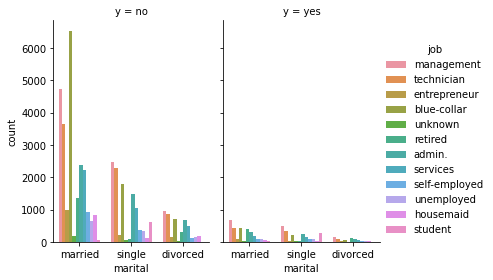

In [ ]:
%matplotlib inline

sns.catplot(x="marital", 
            hue="job", 
            col="y",
            data=df, kind="count",
            height=4, aspect=.7)
plt.show()

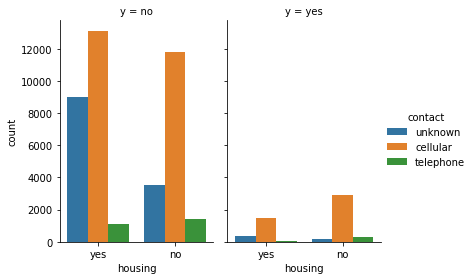

In [ ]:
g = sns.catplot(x="housing", 
                hue="contact", 
                col="y",
                data=df, kind="count",
                height=4, aspect=.7)

g.savefig("bank_housing_contact.png", dpi=100)

run.log(
        {
            "bank_housing_contact": wandb.Image("bank_housing_contact.png")
        }
    )

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
run.finish()

# 1.0 An end-to-end classification problem (ETL)



## 1.1 Dataset description



The datasets accessed were from **bank-full.csv** ordered by date (from May 2008 to November 2010) with all examples and 17 entries, sorted by date (older version of this dataset with fewer entries).

The input variables are related the data of **bank customers**, related with the **last contact** of the current campaign and attributes related to **campaign previus**.

The classification goal is to predict if the client will **subscribe** (yes/no) a **term deposit** (variable y).

You can download the data from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Adult).

Let's take the following steps:

1. Load Libraries
2. Fetch Data, including EDA
3. Pre-procesing
4. Data Segregation

<center><img width="600" src="https://drive.google.com/uc?export=view&id=1a-nyAPNPiVh-Xb2Pu2t2p-BhSvHJS0pO"></center>

## 1.2 Install and load libraries

In [ ]:
# !pip install wandb

In [ ]:
import wandb
import pandas as pd

## 1.3 Preprocessing

### 1.3.1 Login wandb


In [ ]:
# Login to Weights & Biases
# !wandb login --relogin

### 1.3.2 Artifacts

In [ ]:
input_artifact="mlops_ivan/decision_tree_bank/raw_data.csv:latest"
artifact_name="preprocessed_data.csv"
artifact_type="clean_data"
artifact_description="Data after preprocessing"

### 1.3.3 Setup your wandb project and clean the dataset

After the fetch step the raw data artifact was generated.
Now, we need to pre-processing the raw data to create a new artfiact (clean_data).

In [ ]:
# create a new job_type
run = wandb.init(project="decision_tree_bank", entity="mlops_ivan", job_type="process_data")

In [ ]:
# donwload the latest version of artifact raw_data.csv
artifact = run.use_artifact(input_artifact)

# create a dataframe from the artifact
df = pd.read_csv(artifact.file())

In [ ]:
# Delete duplicated rows
df.drop_duplicates(inplace=True)

# Generate a "clean data file"
df.to_csv(artifact_name,index=False)

In [ ]:
# Create a new artifact and configure with the necessary arguments
artifact = wandb.Artifact(name=artifact_name,
                          type=artifact_type,
                          description=artifact_description)
artifact.add_file(artifact_name)

<ManifestEntry digest: PEf0GLzgaYbFa8V+tv7KzA==>

In [ ]:
# Upload the artifact to Wandb
run.log_artifact(artifact)

In [ ]:
# close the run
# waiting a while after run the previous cell before execute this
run.finish()